###                                       INEURON MLDPI ASSIGNMENT: 8_DATA VISUALIZATION

#### QUESTION 1
In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [33]:
#load iris dataset
iris = load_iris()

# np.c_ is the numpy concatenate function: which is used to concat iris['data'] and iris['target'] arrays for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like.. the original dataset would probably call this ['Species']

iris1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [34]:
# Creating x & y variable

x = iris1.iloc[:,:-1].values
y = iris1.iloc[:,4].values

In [35]:
#PCA decomposisition 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [39]:
finalDf = pd.concat([principalDf, iris1[['target']]], axis = 1)

In [42]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

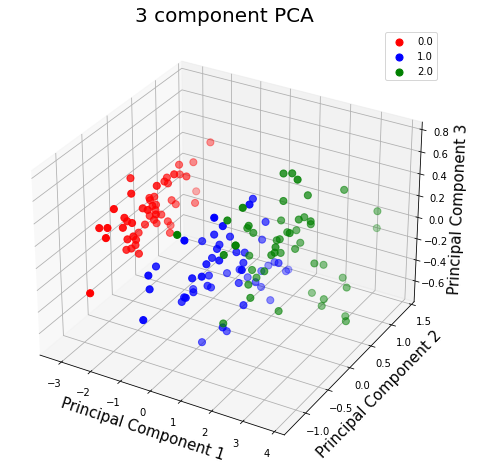

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [0.0, 1.0, 2.0]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()